In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.holtwinters import (
    SimpleExpSmoothing,
    Holt,
    ExponentialSmoothing
)


In [7]:
df = pd.read_csv("data/c4.csv")
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')
df.set_index('DATE', inplace=True)
y = df['Consumption']
y.head()

DATE
1988-01-01    107.5052
1988-02-01    105.6720
1988-03-01     97.4502
1988-04-01     92.4714
1988-05-01     90.3151
Name: Consumption, dtype: float64

In [18]:
# Simple Exponential Smoothing
ses_model = SimpleExpSmoothing(y).fit(
    smoothing_level=0.2,
    optimized=False
)
ses_fitted_values = ses_model.fittedvalues

# Holt model (Double Exponential Smoothing)
holt_model = Holt(y).fit(
    smoothing_level=0.3,
    smoothing_trend=0.1,
    optimized=False
)

holt_fitted_values = holt_model.fittedvalues

hw_model = ExponentialSmoothing(
    y,
    trend='add',
    seasonal='add',
    seasonal_periods=12
).fit()
hw_fitted_values = hw_model.fittedvalues


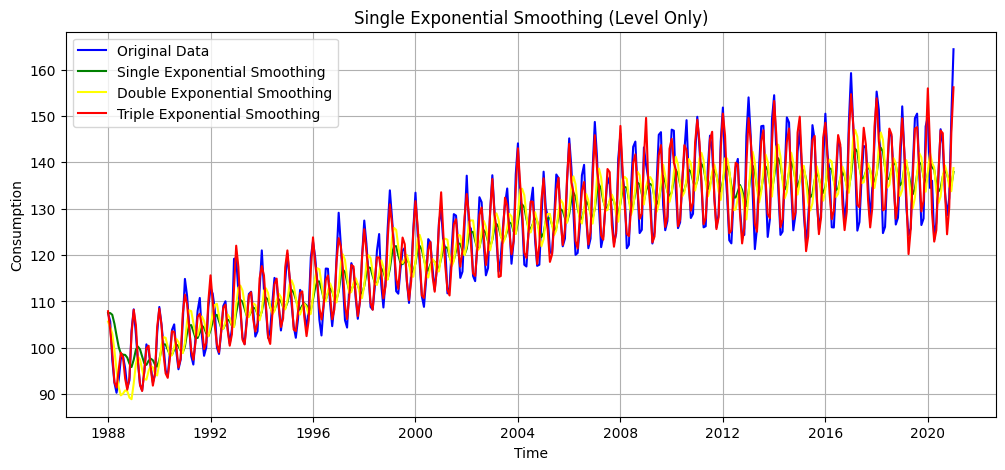

In [19]:
plt.figure(figsize=(12, 5))
plt.plot(y, label='Original data', color='blue')
plt.plot(ses_fitted_values, label='Single Exponential Smoothing', color='green')
plt.plot(holt_fitted_values, label='Double Exponential Smoothing', color='yellow')
plt.plot(hw_fitted_values, label='Triple Exponential Smoothing', color='red')
plt.title('Single Exponential Smoothing (Level Only)')
plt.xlabel('Time')
plt.ylabel('Consumption')
plt.legend()
plt.grid(True)
plt.show()
